<a href="https://colab.research.google.com/github/alshubati99/Data-Science-Study/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
- it is to predict numerical quantity like profit, cost, sales volume.
- linear regression models are expected value of numeric quantity(called dependant or response variable or outcome variable), in terms of numeric and categorical inputs(called independent or explanatory variables)
- key assumption: relationship between input var and output var is *linear*
- there is a linear relationship between input variables and response variable.
- `y = a0+a1x1+a2x2+a3x3+...+` y = dependent and x = independent. ai= should be computed using training data.
- `income = a0 + a1 Age + a2 Education + e` => predict income based on age and education
- the fitted model should minimize the overall error between the linear model and actual observations
- *OLS* => Ordinary Least Square: common technique to estimate parameters.
  - can be achieved by minimizing the bojective function(sum[incomei-(a0+a1Agei+a2Education)]^2
  - N = idividual distances are squared and then summed to compute value of objective function
- *Linear Model* =>residuals should be minimized
- in 2D plane, the modle is a plane representing the relation between dependant variable with 2 indpendant onse
- model will never fit if there is no linear relationship and outliers may mislead model estimation algorithm.
- with a given response variable and dependant variable we can always compute a llinear model.
- *Checking Correlation*:
  - association between indpendent variables is problematic (multicollinearity)
  - if there is high degree of correlation between variables, it may be difficult to fit and intrepret the findings.
  - the dependency between variables can be obtained by scatter plot or correlation analysis.
  - *positive correlation*: one variable increase, the other increase
  - *negative correlation*: one variable increase the other decrease
  - *no correlation*: when no increase or decrease.
  - there is a formula to compute correlation.
- make sure the sample size is sufficient.
- do not use regression model to predict responses outside range of data that was used to build the model.
- eleminate outliers at the begining
- check if predictors are uncorrelated.
- examine scatter plot of dependent variable with each indpendent variable to validate the assumption of linearity.




In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [8]:
df = pd.read_csv('trees.csv')
df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


<Axes: xlabel='Height', ylabel='Volume'>

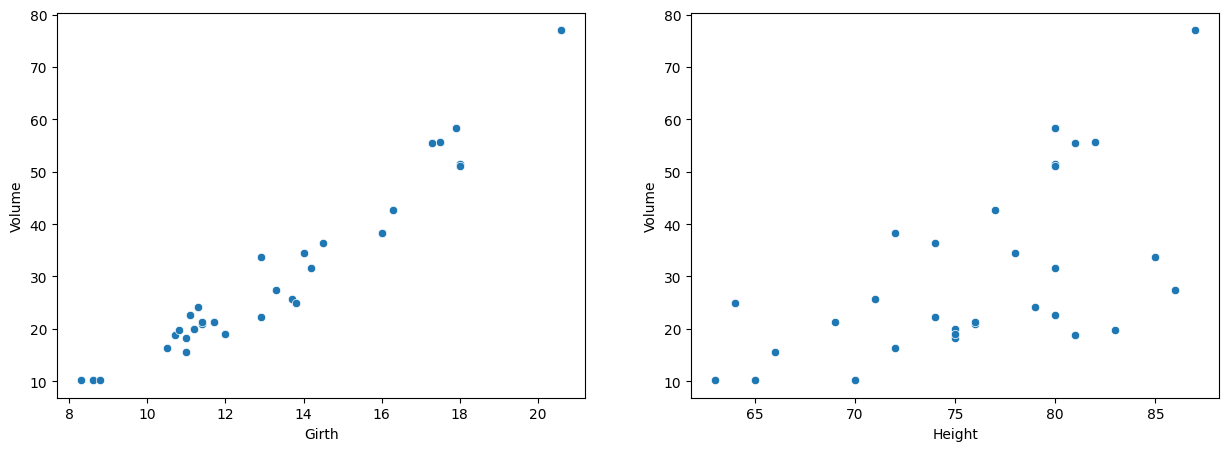

In [14]:
# check linearity of the relationship:
fig, ax = plt.subplots(1,2, figsize = (15,5))
sns.scatterplot(ax = ax[0],x='Girth', y='Volume', data = df)
sns.scatterplot(ax = ax[1],x='Height', y='Volume', data = df)

# there is a strong relationship between dependent variable(volume ) and (girth)

<Axes: >

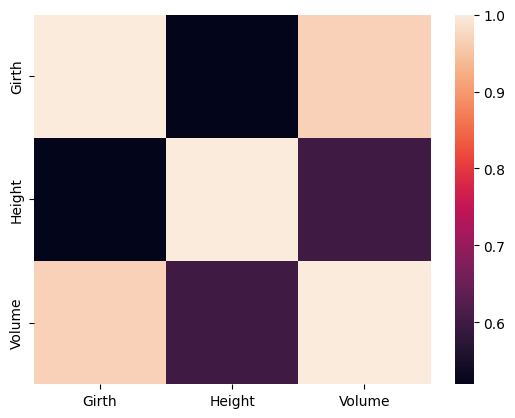

In [15]:
# correlation analysis
cormat = df.corr()
sns.heatmap(cormat)

# shows volume has large correlation with girth but lower correlcation with height

In [19]:
# the model using girth
import statsmodels.api as sm
df = sm.add_constant(df)
res = sm.OLS(df.Volume, df[['const','Girth']]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     419.4
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           8.64e-19
Time:                        22:57:21   Log-Likelihood:                -87.822
No. Observations:                  31   AIC:                             179.6
Df Residuals:                      29   BIC:                             182.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -36.9435      3.365    -10.978      0.0

In [20]:
# model using height
res = sm.OLS(df.Volume, df[['const','Height']]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     16.16
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           0.000378
Time:                        22:58:18   Log-Likelihood:                -123.40
No. Observations:                  31   AIC:                             250.8
Df Residuals:                      29   BIC:                             253.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -87.1236     29.273     -2.976      0.0

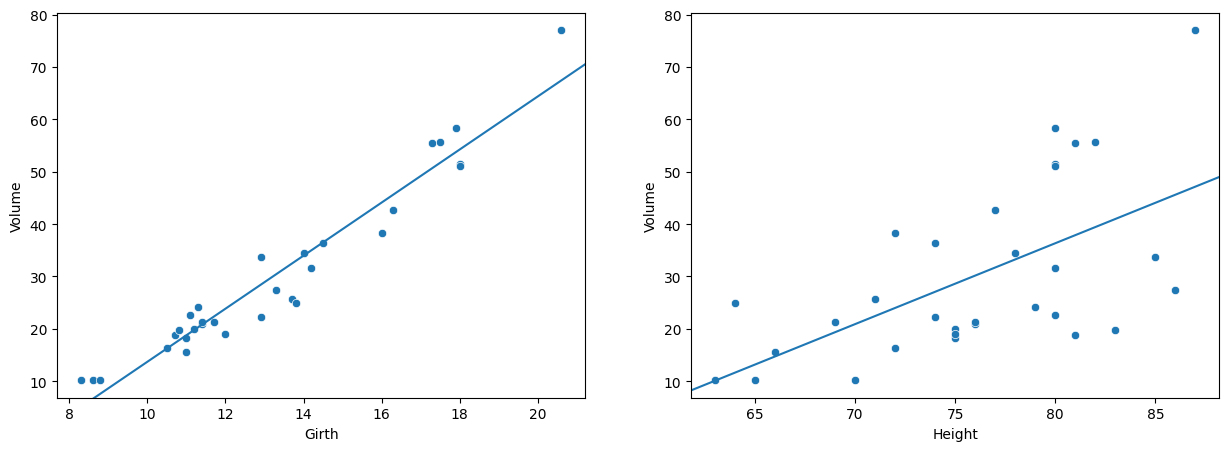

In [21]:
# model using individual variables:
model = sm.OLS(df.Volume, df[['const','Girth']]).fit()
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.scatterplot(x='Girth', y='Volume',data = df, ax = ax[0])
sm.graphics.abline_plot(model_results = model, ax=ax[0])

model = sm.OLS(df.Volume, df[['const','Height']]).fit()
sns.scatterplot(x='Height', y='Volume',data = df, ax = ax[1])
sm.graphics.abline_plot(model_results = model, ax=ax[1])

plt.show()

In [22]:
model = sm.OLS(df.Volume, df[['const','Height']]).fit()
print(model.params)

const    -87.123614
Height     1.543350
dtype: float64


In [23]:
model = sm.OLS(df.Volume, df[['const','Girth']]).fit()
print(model.params)

const   -36.943459
Girth     5.065856
dtype: float64


In [25]:
pd.DataFrame().assign(Volume = df.Volume, Girth=df.Girth,
                      Fitted = model.fittedvalues, Residuals = model.resid,
                      Manual = -36.943459 + df.Girth*5.065856)

,Volume,Girth,Fitted,Residuals,Manual
0,10.3,8.3,5.103149,5.196851,5.103146
1,10.3,8.6,6.622906,3.677094,6.622903
2,10.2,8.8,7.636077,2.563923,7.636074
3,16.4,10.5,16.248033,0.151967,16.248029
4,18.8,10.7,17.261205,1.538795,17.261200
5,19.7,10.8,17.767790,1.932210,17.767786
6,15.6,11.0,18.780962,-3.180962,18.780957
7,18.2,11.0,18.780962,-0.580962,18.780957
8,22.6,11.1,19.287547,3.312453,19.287543
9,19.9,11.2,19.794133,0.105867,19.794128


# Model Information
- the *residuals* are differences between actual measured values and corresponding values in the fitted regression line
- Good model will tend to have median residual value near zero, min&max values of roughly same magnitude, first and third quartile values of roughly same magnitude.
- for good model check standard error that is at least 5 to 10 times smaller than the corresponding coefficient. Otherwhise, the estimate of this coefficient can vary significantly from one dataset to another.
- the p>|t| column shows the probability that the corresponding coefficient is *not relevant* in the model. it is known as the significance or p-value of the coefficient. `the smaller p-value the better`
- *number of degrees of freedome* => (DF Residuals) => total number of measurements or observations used to generate model. (minus number of coefficient in model)
- the *R-squared* value is a number between 0 and 1. it is a statistical measure of how well the model describes the measured data. `the closer to one the better fitted model`.
- First step in developing multi-variable regression model is to identify all possible predictors that we could include in the model.
- Good regression model explains the relationship between a system's inputs and outputs as simply as possible. Thus we should use the smallest number of predictors necessary to provide good predictions.
- Using all existing variables we may obtain and over-fitted model that is very good only at predicting outputs from specific input data set used to train model.
- Redundant or unecessary predictors also can lead to numberical instabilities when computing coefficients.
- find balance between including too few and too many predictors.
  - Model with few predictors => produce biased prediction
  - Model with more predictors => cause R square value to increase.
- The adjusted R sequared attempts to compensate for regular Rsequare's behavior by changing the R sequare value according to the number of predictors in the model.


In [26]:
# multi-variable regression
res = sm.OLS(df.Volume, df[['const','Girth','Height']]).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     255.0
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.07e-18
Time:                        23:21:02   Log-Likelihood:                -84.455
No. Observations:                  31   AIC:                             174.9
Df Residuals:                      28   BIC:                             179.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -57.9877      8.638     -6.713      0.0

### Linear Regression Using Interactions

In [27]:
df = sm.add_constant(df)
df['GirthTimesHeight'] = df.Girth * df.Height
print(df.head())
model = sm.OLS(df.Volume, df[['const','Girth','Height','GirthTimesHeight']]).fit()
print(model.summary())

   const  Girth  Height  Volume  GirthTimesHeight
0    1.0    8.3      70    10.3             581.0
1    1.0    8.6      65    10.3             559.0
2    1.0    8.8      63    10.2             554.4
3    1.0   10.5      72    16.4             756.0
4    1.0   10.7      81    18.8             866.7
                            OLS Regression Results                            
Dep. Variable:                 Volume   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     359.3
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           7.29e-22
Time:                        23:23:37   Log-Likelihood:                -72.735
No. Observations:                  31   AIC:                             153.5
Df Residuals:                      27   BIC:                             159.2
Df Model:                           3                               

# Elimination of Redundant Variables
- *collinearity* => some variables may be related with each other, where one variable can be predicted from the other with very high accuracy.
- *important question* => considering sed of dependent variables, which subset of them and which subset of interactions should we use in our model?
- in practice => trying every combination is not feasible. for 10 variables there are 2^10 possible combinations
- *forward selection and backward selection* => used to eliminate redundant variables.
- *in forward selection* => variables are *added* one by one to the model as long as performance criterion is satisfied.
- *in backward selection* => variables are *droped* from variales list one by one. the variable leading to heighest gain leads to best model is selected as victim to be removed from model.
- this process is repeated until further improvement is not possible

### Backward Elimination Using p-values

> Indented block



In [28]:
data = pd.read_csv('mtcars.csv')
data = sm.add_constant(data,prepend=False) # put const to end
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,const
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,1.0
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,1.0
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,1.0
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,1.0
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,1.0


In [30]:
# predict miles per gallon using 10 predictors and a constant term
model = sm.OLS(data.mpg, data.iloc[:,2:13]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           3.79e-07
Time:                        23:38:37   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cyl           -0.1114      1.045     -0.107      0.9

In [32]:
model = sm.OLS(data.mpg, data[['disp','hp','drat','wt','qsec','vs','am','gear','carb','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     16.21
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           9.03e-08
Time:                        23:40:51   Log-Likelihood:                -69.864
No. Observations:                  32   AIC:                             159.7
Df Residuals:                      22   BIC:                             174.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0128      0.017      0.763      0.4

In [34]:
# removed vs
model = sm.OLS(data.mpg, data[['disp','hp','drat','wt','qsec','am','gear','carb','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     19.02
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.01e-08
Time:                        23:41:56   Log-Likelihood:                -69.893
No. Observations:                  32   AIC:                             157.8
Df Residuals:                      23   BIC:                             171.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0121      0.016      0.753      0.4

In [35]:
#remove crab
model = sm.OLS(data.mpg, data[['disp','hp','drat','wt','qsec','vs','am','gear','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     18.99
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.05e-08
Time:                        23:42:39   Log-Likelihood:                -69.920
No. Observations:                  32   AIC:                             157.8
Df Residuals:                      23   BIC:                             171.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0159      0.012      1.275      0.2

In [36]:
# remove drat,
model = sm.OLS(data.mpg, data[['disp','hp','wt','qsec','vs','am','gear','carb','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     18.77
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.28e-08
Time:                        23:43:57   Log-Likelihood:                -70.077
No. Observations:                  32   AIC:                             158.2
Df Residuals:                      23   BIC:                             171.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
disp           0.0132      0.017      0.801      0.4

In [37]:
# remove disp
model = sm.OLS(data.mpg, data[['hp','drat','wt','qsec','vs','am','gear','carb','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     18.50
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.63e-08
Time:                        23:44:23   Log-Likelihood:                -70.281
No. Observations:                  32   AIC:                             158.6
Df Residuals:                      23   BIC:                             171.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0123      0.016     -0.743      0.4

In [38]:
# remove disp
model = sm.OLS(data.mpg, data[['hp','qsec','am','gear','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     26.00
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           6.43e-09
Time:                        23:45:25   Log-Likelihood:                -77.106
No. Observations:                  32   AIC:                             164.2
Df Residuals:                      27   BIC:                             171.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0506      0.014     -3.723      0.0

In [39]:
# remove qsec
model = sm.OLS(data.mpg, data[['hp','am','gear','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     34.83
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           1.38e-09
Time:                        23:46:09   Log-Likelihood:                -77.509
No. Observations:                  32   AIC:                             163.0
Df Residuals:                      28   BIC:                             168.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0597      0.008     -7.537      0.0

In [41]:
# remove gear
model = sm.OLS(data.mpg, data[['hp','am','const']]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     52.02
Date:                Thu, 23 Nov 2023   Prob (F-statistic):           2.55e-10
Time:                        23:47:14   Log-Likelihood:                -78.003
No. Observations:                  32   AIC:                             162.0
Df Residuals:                      29   BIC:                             166.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
hp            -0.0589      0.008     -7.495      0.0

### Forward Selection


In [43]:
target = data.mpg
remaining = list(data.columns)
remaining.remove('model')
remaining.remove('mpg')
selected = []

current_score, best_new_score = 0.0, 0.0
scores_with_candidates = []

while len(remaining)>0:
  for candidate in remaining:
    newList = selected.copy()
    newList.append(candidate)
    score = sm.OLS(data.mpg, data[newList]).fit().rsquared_adj
    scores_with_candidates.append((score,candidate))

  scores_with_candidates.sort()
  best_new_score, best_candidate = scores_with_candidates.pop()
  print(best_new_score)
  if current_score < best_new_score:
    remaining.remove(best_candidate)
    selected.append(best_candidate)
    current_score = best_new_score
  else:
    break

model = sm.OLS(data.mpg, data[selected]).fit()
print(model.summary())


0.9528396301864428
0.9747697785383639
0.9803643185312364
0.9811137981183516
0.9816708405139872
0.984629105308225
0.9852795013851531
0.9855503647007219
0.9853233123202986
                                 OLS Regression Results                                
Dep. Variable:                    mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              273.8
Date:                Thu, 23 Nov 2023   Prob (F-statistic):                    1.16e-21
Time:                        23:53:32   Log-Likelihood:                         -70.355
No. Observations:                  32   AIC:                                      156.7
Df Residuals:                      24   BIC:                                      168.4
Df Model:                           8                                                  
Covariance Type:            nonrobust 

- In practice: different selection methods may lead to different models.
- from performance point of view, different selection methods are expected to provide comparable performance scores